In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

In [41]:
# Load the dataset
data_path = 'datasetCovid.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()


,Gender,Age_G1,Age_G2,Age_G3,Age_G4,Age_G5,FB,TS,ODG,DSN,...,AEG,RIN,PN,VOM,DA,CON,CIA,AN,DSG,label
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
# Check for any missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('label', axis=1)  # Features
y = data['label']  # Target variable

# Splitting the data, with 80% used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Data split into training and testing sets successfully.")

Missing values in each column:
 Gender    0
Age_G1    0
Age_G2    0
Age_G3    0
Age_G4    0
Age_G5    0
FB        0
TS        0
ODG       0
DSN       0
IRR       0
DRA       0
DT        0
ECF       0
CEF       0
MG        0
ART       0
AEG       0
RIN       0
PN        0
VOM       0
DA        0
CON       0
CIA       0
AN        0
DSG       0
label     0
dtype: int64
Data split into training and testing sets successfully.


      Gender  Age_G1  Age_G2  Age_G3  Age_G4  Age_G5  FB  TS  ODG  DSN  ...  \
0          1       0       0       0       0       1   0   0    0    0  ...   
1          1       0       0       1       0       0   0   1    1    1  ...   
2          0       0       0       0       1       0   0   0    0    0  ...   
3          0       0       0       0       0       1   0   1    0    0  ...   
4          1       0       0       1       0       0   1   0    0    0  ...   
...      ...     ...     ...     ...     ...     ...  ..  ..  ...  ...  ...   
3476       1       1       0       0       0       0   0   0    0    0  ...   
3477       1       0       0       1       0       0   0   1    0    0  ...   
3478       1       0       1       0       0       0   0   0    0    0  ...   
3479       1       0       1       0       0       0   1   1    0    0  ...   
3480       1       0       1       0       0       0   0   1    0    0  ...   

      ART  AEG  RIN  PN  VOM  DA  CON  CIA  AN  DSG

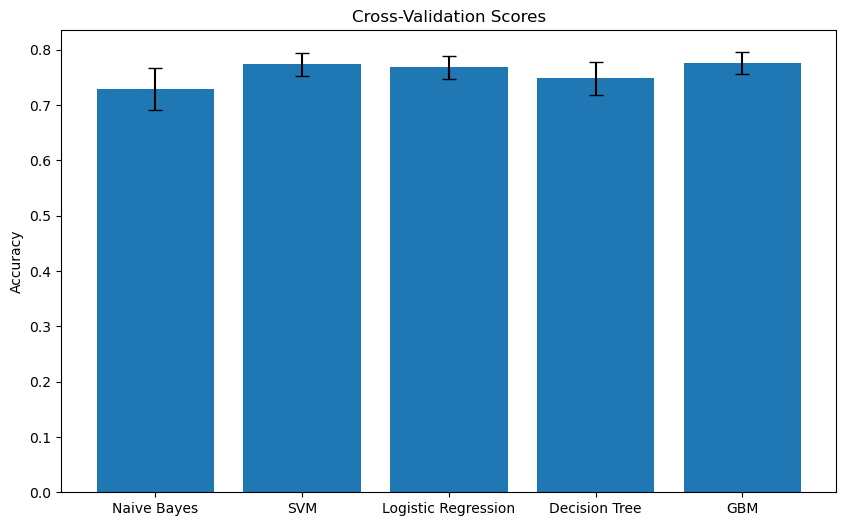

In [4]:

# Initialize the models
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "GBM": GradientBoostingClassifier()
}

# Function to train and evaluate models using cross-validation
def train_eval_models_cv(models, X, y, cv_folds):
    results = {}
    cv = StratifiedKFold(n_splits=cv_folds)

    for name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        # Store results
        results[name] = cv_scores

    return results

# Number of folds for cross-validation
cv_folds = 5
print(X)
# Train and evaluate the models using cross-validation
cv_results = train_eval_models_cv(models, X, y, cv_folds)

# Display cross-validation results
print("Cross-validation results (Accuracy scores across folds):")
for model, scores in cv_results.items():
    print(f"{model}: Mean={np.mean(scores):.4f}, Std={np.std(scores):.4f}, Scores={scores}")

# Optional: Plot the results for visual comparison
plt.figure(figsize=(10, 6))
model_names = list(cv_results.keys())
mean_scores = [np.mean(scores) for scores in cv_results.values()]
std_devs = [np.std(scores) for scores in cv_results.values()]
plt.bar(model_names, mean_scores, yerr=std_devs, capsize=5)
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()

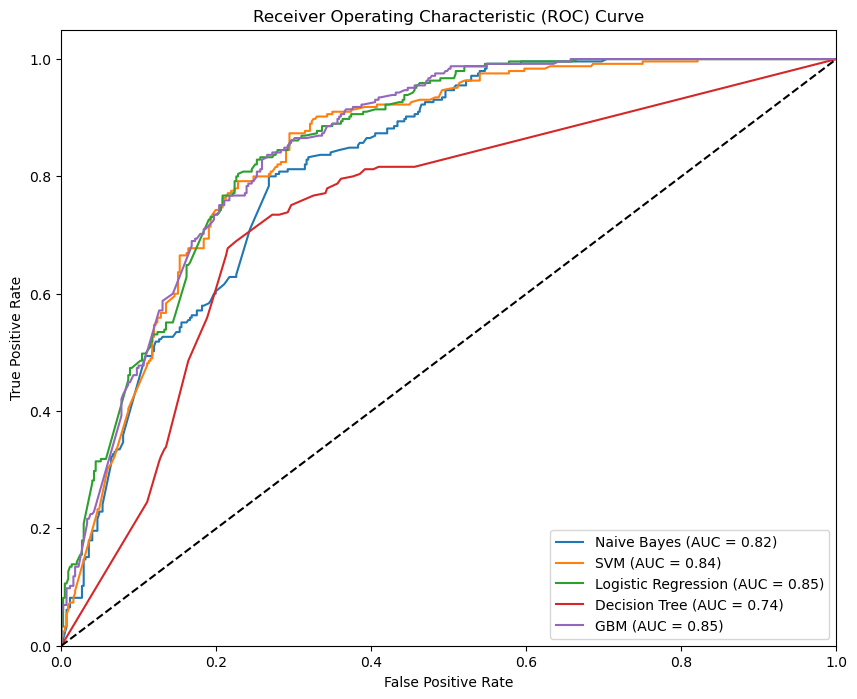

Results for Naive Bayes:
accuracy: 0.7432
precision: 0.5994
recall: 0.8122
f1: 0.6898
roc_auc: 0.8207


Results for SVM:
accuracy: 0.7776
precision: 0.6552
recall: 0.7755
f1: 0.7103
roc_auc: 0.8430


Results for Logistic Regression:
accuracy: 0.7776
precision: 0.6471
recall: 0.8082
f1: 0.7187
roc_auc: 0.8523


Results for Decision Tree:
accuracy: 0.7446
precision: 0.6236
recall: 0.6898
f1: 0.6550
roc_auc: 0.7411


Results for GBM:
accuracy: 0.7676
precision: 0.6379
recall: 0.7837
f1: 0.7033
roc_auc: 0.8523




In [5]:

# Initialize the models
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "GBM": GradientBoostingClassifier()
}

# Function to train and evaluate models
def train_eval_models(models, X_train, y_train, X_test, y_test):
    results = {}
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        # ROC AUC, Decision Tree needs a check as it might not support predict_proba
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
            roc_auc = roc_auc_score(y_test, y_probs)
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        else:
            y_probs = model.decision_function(X_test)
            roc_auc = roc_auc_score(y_test, y_probs)
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

        results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc}

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return results

# Train and evaluate the models
results = train_eval_models(models, X_train, y_train, X_test, y_test)

# Display results
for model, metrics in results.items():
    print(f"Results for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

In [45]:
X_prueba = data[['FB','TS','ODG','DSN','IRR','DRA','DT','ECF','CEF','MG','ART','AEG','RIN','PN','VOM','DA','CON','CIA','AN','DSG']]
Y_prueba = data['label']

X_train, X_test, y_train, y_test = train_test_split(X_prueba, Y_prueba, test_size=0.20, random_state=42)



In [48]:
model_covid = LogisticRegression()
model_covid.fit(X_train, y_train)
y_pred = model_covid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)

0.6843615494978479


In [49]:
import joblib
# Guardar el modelo en un archivo
joblib.dump(model_covid, 'covid.pkl')

['covid.pkl']

In [52]:
data_prueba = pd.read_csv('C:/Users/anaid/Downloads/sintomas.csv')
regresion_model =  joblib.load('covid.pkl')
y_predict = regresion_model.predict(data_prueba)
y_predict

array([1], dtype=int64)